In [0]:
# import the necessary packages
import numpy as np
from urllib.request import urlopen
import cv2
from matplotlib import pyplot as plt

# METHOD #1: OpenCV, NumPy, and urllib
def url_to_image(url):
	# download the image, convert it to a NumPy array, and then read
	# it into OpenCV format
	resp = urlopen(url)
	image = np.asarray(bytearray(resp.read()), dtype="uint8")
	image = cv2.imdecode(image, cv2.IMREAD_COLOR)
 
	# return the image
	return image

In [0]:
image = url_to_image("https://fontsarena-cd5e.kxcdn.com/wp-content/uploads/2019/04/helvetica-now-font-400x364.png")

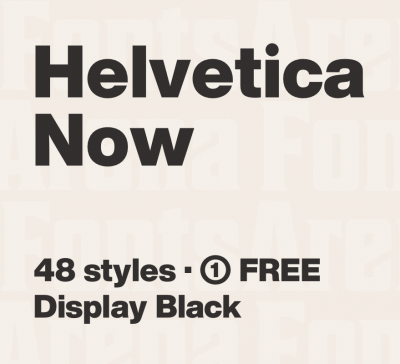

In [4]:
from google.colab.patches import cv2_imshow
cv2_imshow(image)

In [0]:
edges = cv2.Canny(image,100,200)

In [0]:
cv2_imshow(edges)

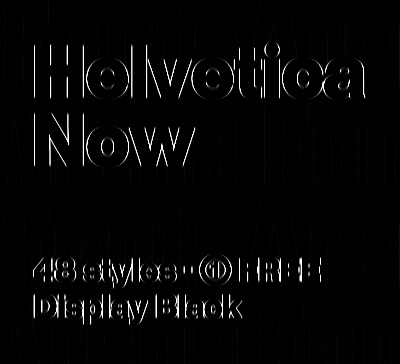

In [7]:
#kernel = np.ones((3,3),np.float32)/25
#vertical edge detection
kernel = np.float32([[-1,2,-1],[-1,2,-1],[-1,2,-1]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

Vertical Edge Detectors. This kernel in the step make the vertical edges prominent  because it works like a first order derivative and calculates the difference in pixel values around the edge. Also, the sudden change in intensites between the left and right regions of the images making the vertical edges more prominent.

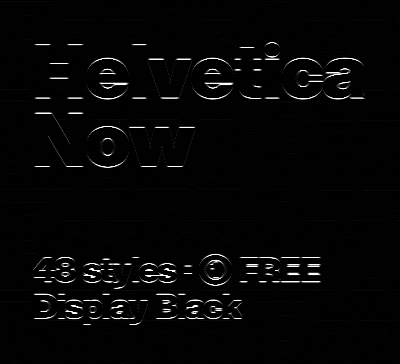

In [8]:
#horizontal Edge detection
kernel = np.float32([[-1,-1,-1],[2,2,2],[-1,-1,-1]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

Horizontal Edge Detection is vertical detection kernal rotated by 90 degrees for horizontal edge detection.

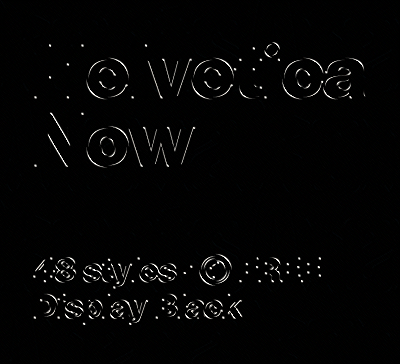

In [9]:
#Highlighting 45 Degree Angle Detector (either)
kernel = np.float32([[2,-1,-1],[-1,2,-1],[-1,-1,2]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)


As you can see that the diagonal values are higher than the other values making it easier to detect 45 degree edges.

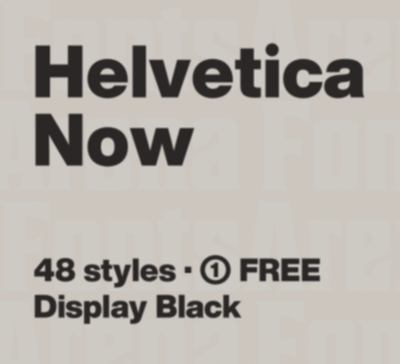

In [10]:
#Highlighting Blur Kernel

kernel = np.float32([[0.06,0.1,0.06],[0.1,0.2,0.1],[0.06,0.1,0.06]])
dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)


The kernel values seem to give equal importance to all the pixels of the input image and hence the blur detection.

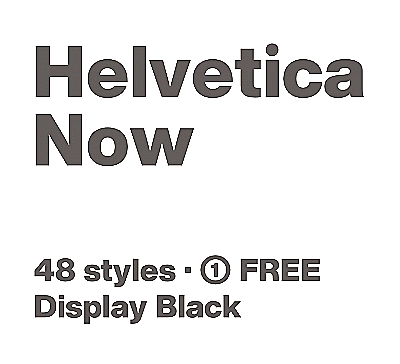

In [11]:
#Highlighting Sharpen Kernel
kernel = np.float32([[0,-1,0],[-1,6,-1],[0,-1,0]])
dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)



The values are chosen in a way to distinguish the sharp edges of the image. This is potentially cause due to significant difference in the values of the kernal.

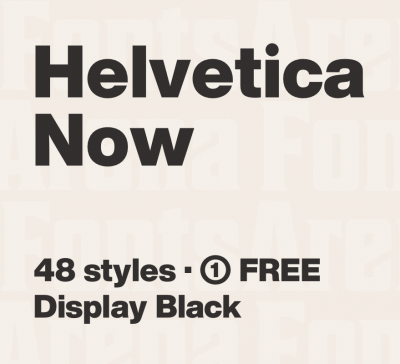

In [12]:
#Highlighting Identity function
kernel = np.float32([[0,0,0],[0,1,0],[0,0,0]])
dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)


Only the centre value of the 3*3 kernal is 1 and rest all are zero and making identical input and output